# Demo: solving XOR with an MLP (Multi-Layer Perceptron)

### XOR is the canonical example of a function that cannot be learned by a linear model because it is not linearly separable. This makes it an interesting example as a neural network will need more than two perceptrons in order to solve it even though there are only two outputs. XOR is one of the simplest problems for which this is true. 

In [1]:
import numpy as np 
from dl_lib.train import train
from dl_lib.neural_net import NeuralNet
from dl_lib.layers import Linear, Tanh
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
%matplotlib inline
np.random.seed(255)

In [2]:
# Mapping. We expect to see targets[i] given inputs[i].
inputs = np.array([
    [0, 0],
    [1, 0],
    [0, 1],
    [1, 1]
])

targets = np.array([
    [1, 0], 
    [0, 1],
    [0, 1],
    [1, 0]
])

In [3]:
# Simple MLP (Multi-Layer Perceptron) neural network.
mlp = NeuralNet([
    Linear(input_size=2, output_size=2),
    Tanh(),
    Linear(input_size=2, output_size=2)
])

loss_values = train(mlp, inputs, targets, num_epochs=5000)

epoch_nums = [n for n in range(1, len(loss_values) + 1)]

for x, y in zip(inputs, targets):
    predicted = mlp.forward(x)
    print(x, predicted, y)

100%|██████████| 5000/5000 [00:00<00:00, 10672.81it/s]

[0 0] [0.31867598 0.65786685] [1 0]
[1 0] [0.35326315 0.66909249] [0 1]
[0 1] [0.34524292 0.65613332] [0 1]
[1 1] [0.97584284 0.02350753] [1 0]


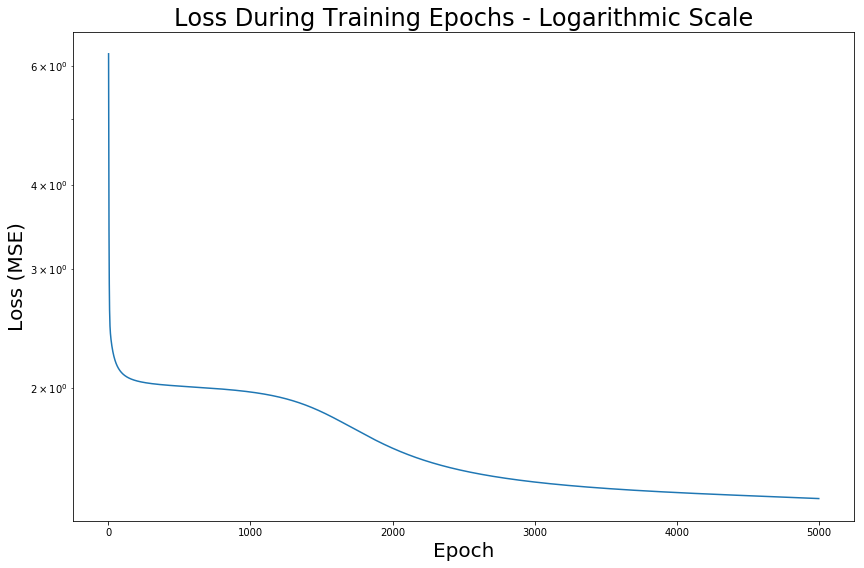

In [4]:
plt.figure(figsize=(14, 9))
plt.title("Loss During Training Epochs - Logarithmic Scale", fontsize=24)
plt.xlabel("Epoch", fontsize=20)
plt.ylabel("Loss (MSE)", fontsize=20)
plt.yscale("log")
plt.plot(epoch_nums, loss_values);

### The error is still unsatisfactorily high. Let's do 5,000 more epochs.

In [5]:
new_loss_values = train(mlp, inputs, targets, num_epochs=5000)

new_epoch_nums = [n for n in range(1, len(loss_values) + 1)]

for x, y in zip(inputs, targets):
    predicted = mlp.forward(x)
    print(x, predicted, y)

100%|██████████| 5000/5000 [00:00<00:00, 10743.58it/s]

[0 0] [ 9.99999916e-01 -5.26594999e-08] [1 0]
[1 0] [-1.52880543e-06  1.00000159e+00] [0 1]
[0 1] [1.58224120e-06 9.99998483e-01] [0 1]
[1 1] [ 1.00000001e+00 -5.57217076e-08] [1 0]


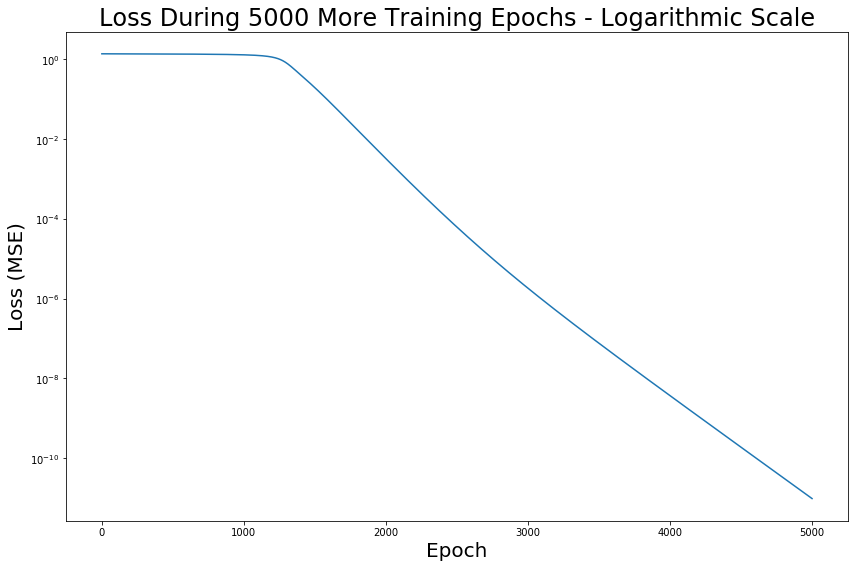

In [6]:
plt.figure(figsize=(14, 9))
plt.title("Loss During 5000 More Training Epochs - Logarithmic Scale", fontsize=24)
plt.xlabel("Epoch", fontsize=20)
plt.ylabel("Loss (MSE)", fontsize=20)
plt.yscale("log")
plt.plot(new_epoch_nums, new_loss_values);

### The next 5,000 epochs clearly yield a significant improvement. Now it seems time for a more quantitative analysis. The proceeding two cells construct a faux dataset of 1,000 random XOR inputs and their intended outputs, then scores the model's accuracy against this. 

In [7]:
# Building a testing dataset
X_test, y_test = [], []
for _ in range(1000):
    i = np.random.randint(4)
    X_test.append(inputs[i])
    y_test.append(float(targets[i][1]))

In [8]:
# Testing model accuracy
y_pred = [round(x[1]) for x in mlp.forward(X_test)]
accuracy_score(y_test, y_pred)

1.0

### This simple multi-layer perceptron achieves 100% accuracy on XOR given this particular random seed, set of parameters, and set of inputs. 